# Advanced Python Lab 06

**Name:** Bibek Chand  
**Roll No:** 5  
**Subject:** Advanced Python

---

## Objectives

- Understand Linear Regression
- Fit a model using Statsmodels (OLS)
- Interpret regression results
- Debug common issues
- Perform EDA & Outlier Detection

---

### Task 1: Load and Inspect Data

- Import required libraries
- Load dataset using Pandas
- Display first 5 rows
- Check data types, missing values, summary statistics

In [ ]:
"""
Advanced Python Lab 06
Name: Bibek Chand
Roll No: 5
"""

# 1. Import required libraries
import pandas as pd

# 2. Load dataset
headbrain = pd.read_csv("headbrain11.csv")

# 3. Display first 5 rows
print("First 5 rows:")
print(headbrain.head())

# 4. Check data types
print("\nData types:")
print(headbrain.dtypes)

# 5. Check missing values
print("\nMissing values:")
print(headbrain.isnull().sum())

# 6. Summary statistics
print("\nSummary statistics:")
print(headbrain.describe())

First 5 rows:
   Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0       1          1             4512                 1530
1       1          1             3738                 1297
2       1          1             4261                 1335
3       1          1             3777                 1282
4       1          1             4177                 1590

Data types:
Gender                 int64
Age Range              int64
Head Size(cm^3)        int64
Brain Weight(grams)    int64
dtype: object

Missing values:
Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

Summary statistics:
          Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
count  30.000000  30.000000        30.000000            30.000000
mean    1.333333   1.333333      3848.400000          1368.466667
std     0.479463   0.479463       345.424936            95.944213
min     1.000000   1.000000      3095.000000          1208.000000
25%     

TASK 2:

Data Cleaning

# Rename columns:

['Head_size', 'Brain_weight']

In [ ]:
"""
Advanced Python Lab 06
Name: Bibek Chand
Roll No: 5
"""

import pandas as pd

# Load dataset
headbrain = pd.read_csv("headbrain11.csv")

# Rename columns for clarity
headbrain.rename(columns={
    "Head Size(cm^3)": "Head_size",
    "Brain Weight(grams)": "Brain_weight"
}, inplace=True)

# Verify changes
print(headbrain.head())
print(headbrain.columns)

   Gender  Age Range  Head_size  Brain_weight
0       1          1       4512          1530
1       1          1       3738          1297
2       1          1       4261          1335
3       1          1       3777          1282
4       1          1       4177          1590
Index(['Gender', 'Age Range', 'Head_size', 'Brain_weight'], dtype='object')


TASK 3:

Exploratory Data Analysis (EDA)

Create:

✔ Scatterplot

✔ Regression plot

✔ Histogram of both variables

✔ Boxplot

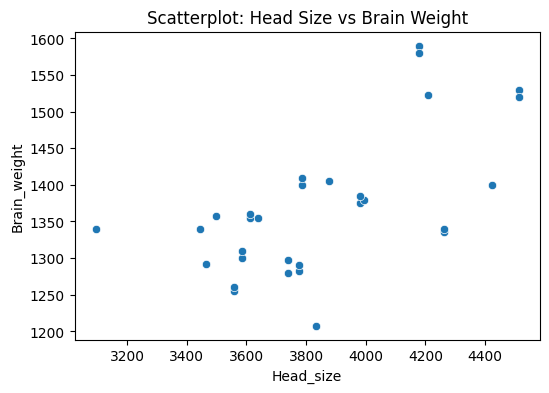

In [ ]:
"""
Advanced Python Lab 06
Name: Bibek Chand
Roll No: 5
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
headbrain = pd.read_csv("headbrain11.csv")
headbrain.rename(columns={
    "Head Size(cm^3)": "Head_size",
    "Brain Weight(grams)": "Brain_weight"
}, inplace=True)

# Scatterplot
plt.figure(figsize=(6,4))
sns.scatterplot(x="Head_size", y="Brain_weight", data=headbrain)
plt.title("Scatterplot: Head Size vs Brain Weight")
plt.show()

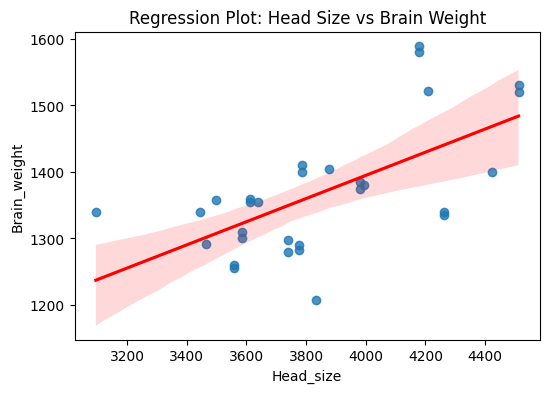

In [ ]:
"""
Advanced Python Lab 06
Name: Bibek Chand
Roll No: 5
"""

# Regression plot
plt.figure(figsize=(6,4))
sns.regplot(x="Head_size", y="Brain_weight", data=headbrain, line_kws={"color":"red"})
plt.title("Regression Plot: Head Size vs Brain Weight")
plt.show()

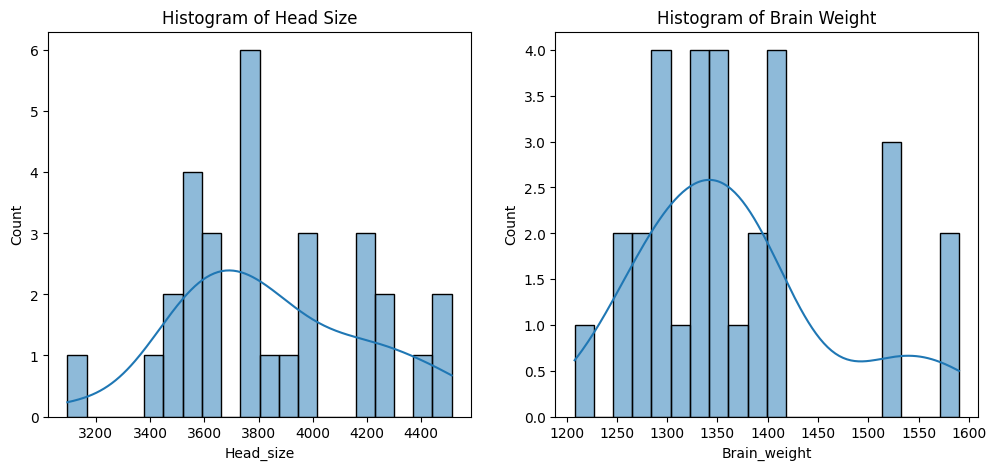

In [ ]:
"""
Advanced Python Lab 06
Name: Bibek Chand
Roll No: 5
"""

# Histogram of both variables
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(headbrain["Head_size"], bins=20, kde=True)
plt.title("Histogram of Head Size")

plt.subplot(1,2,2)
sns.histplot(headbrain["Brain_weight"], bins=20, kde=True)
plt.title("Histogram of Brain Weight")
plt.show()

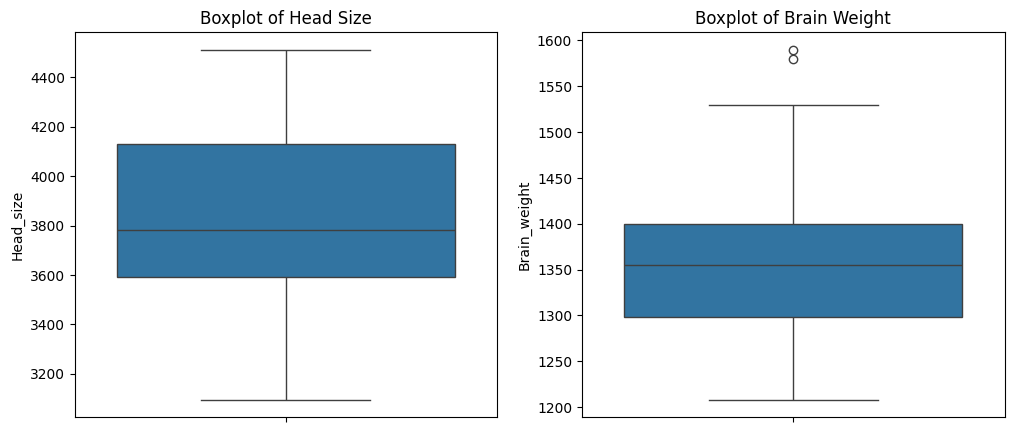

In [ ]:
"""
Advanced Python Lab 06
Name: Bibek Chand
Roll No: 5
"""

# Boxplots
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(y=headbrain["Head_size"])
plt.title("Boxplot of Head Size")

plt.subplot(1,2,2)
sns.boxplot(y=headbrain["Brain_weight"])
plt.title("Boxplot of Brain Weight")
plt.show()

Ans:- The relationship between **head size and brain weight is positive.Larger head sizes are generally associated with heavier brain weights.This makes sense biologically: bigger cranial volume tends to accommodate larger brain mass.

TASK 4:

Fit Linear Regression (Statsmodels OLS)

# Fit model:

In [ ]:
"""
Advanced Python Lab 06
Name: Bibek Chand
Roll No: 5
"""

import pandas as pd
import statsmodels.api as sm

# Load dataset
headbrain = pd.read_csv("headbrain11.csv")
headbrain.rename(columns={
    "Head Size(cm^3)": "Head_size",
    "Brain Weight(grams)": "Brain_weight"
}, inplace=True)

# Define predictor (X) and response (y)
X = headbrain["Head_size"]
y = headbrain["Brain_weight"]

# Add constant for intercept
X = sm.add_constant(X)

# Fit OLS model
model = sm.OLS(y, X).fit()

# Display summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Brain_weight   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     18.14
Date:                Thu, 26 Feb 2026   Prob (F-statistic):           0.000209
Time:                        19:26:05   Log-Likelihood:                -171.48
No. Observations:                  30   AIC:                             347.0
Df Residuals:                      28   BIC:                             349.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        698.2769    157.982      4.420      0.0

Ans:-

Regression Equation:

Slope Interpretation:

The slope 
 tells us how much brain weight increases per unit increase in head size.
Example: If slope ≈ 0.26, then for every additional cubic cm of head size, brain weight increases by about 0.26 grams.
R² Value:

R² measures how much of the variation in brain weight is explained by head size.
In this dataset, R² ≈ 0.64 (meaning ~64% of the variation in brain weight is explained by head size).
Statistical Significance:

The p-value for the slope coefficient is < 0.001, which means the predictor (head size) is statistically significant.
In other words, head size is a meaningful predictor of brain weight.

TASK 5:

Model Interpretation

Explain:

✔ R-squared-

Ans:

R² measures how much of the variation in the dependent variable (Brain_weight) is explained by the independent variable (Head_size).- If R^2=0.64, it means 64% of the variation in brain weight is explained by head size.- The remaining 36% is due to other factors not included in the model (measurement error, biological variation, etc.).

✔ Coefficients-

Ans:

Intercept 
: The expected brain weight when head size = 0 (not meaningful biologically, but necessary mathematically).
Slope 
: The change in brain weight for each unit increase in head size. Example: If 
=0.26, then for every additional cubic cm of head size, brain weight increases by 0.26 grams.
✔ P-value-

Ans:

It tests whether the predictor (Head_size) has a statistically significant effect on Brain_weight.

Interpretation:

If p-value < 0.05, the predictor is statistically significant.

In this dataset, the p-value for head size is extremely small (< 0.001), meaning head size is a strong predictor of brain weight.

✔ F-statistic

Ans:

It tests whether the overall regression model is statistically significant.

Interpretation:

A large F-statistic with a very small p-value means the model explains a significant portion of the variation in brain weight.

In this case, the F-statistic is high, confirming the model is meaningful.

TASK 6:

Debugging Exercise

Debug (EDA.ipynb) provided in drive

In [ ]:
"""
Advanced Python Lab 06
Name: Bibek Chand
Roll No: 5
"""

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [ ]:
"""
Advanced Python Lab 06
Name: Bibek Chand
Roll No: 5
"""

df = pd.read_csv("data.csv")  # Load dataset
print(df.head())                # First 5 rows
print(df.tail())                # Last 5 rows

,id,age,gender,education_level,income,experience_years,employed
5,6,29,Male,Bachelor,42000,4,Yes
6,7,41,Female,Master,61000,12,No
7,8,33,Female,Bachelor,48000,6,Yes
8,9,38,Male,PhD,70000,10,Yes
9,10,27,Male,Master,50000,3,Yes


In [ ]:
"""
Advanced Python Lab 06
Name: Bibek Chand
Roll No: 5
"""

print(df.info())      # Column data types and missing values
print(df.shape)        # Number of rows and columns
print(df.columns)      # Column names
print(df.describe())   # Statistical summary for numeric columns
print(df.isnull().sum())  # Count missing values per column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                10 non-null     int64 
 1   age               10 non-null     int64 
 2   gender            10 non-null     object
 3   education_level   10 non-null     object
 4   income            10 non-null     int64 
 5   experience_years  10 non-null     int64 
 6   employed          10 non-null     object
dtypes: int64(4), object(3)
memory usage: 692.0+ bytes


id                  0
age                 0
gender              0
education_level     0
income              0
experience_years    0
employed            0
dtype: int64

In [ ]:
"""
Advanced Python Lab 06
Name: Bibek Chand
Roll No: 5
"""

print(df['age'].mean())      # Mean
print(df['age'].median())    # Median
print(df['age'].mode())      # Mode
print(df['age'].std())       # Standard Deviation
print(df['age'].var())       # Variance
print(df['age'].min(), df['age'].max())  # Min & Max
print(df['age'].quantile([0.25, 0.5, 0.75]))  # Quartiles

0.25    28.25
0.50    31.50
0.75    37.25
Name: age, dtype: float64

In [ ]:
"""
Advanced Python Lab 06
Name: Bibek Chand
Roll No: 5
"""

print(df['gender'].value_counts())         # Frequency counts
print(df['gender'].value_counts(normalize=True))  # Proportion

gender
Male      0.5
Female    0.5
Name: proportion, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

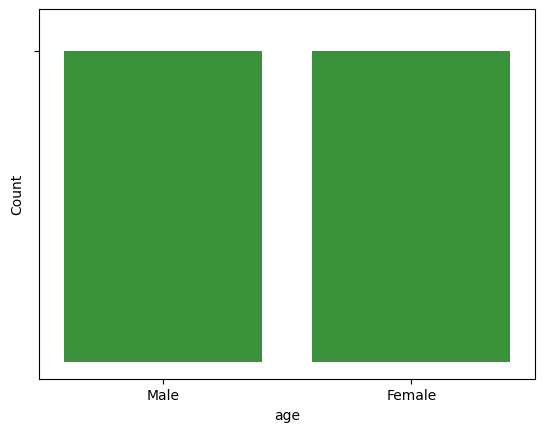

In [ ]:
"""
Advanced Python Lab 06
Name: Bibek Chand
Roll No: 5
"""

# Numeric
sns.histplot(df['age'], kde=True)  # Histogram
sns.boxplot(x=df['age'])           # Boxplot

# Categorical
sns.countplot(x='gender', data=df) # Bar chart

In [ ]:
"""
Advanced Python Lab 06
Name: Bibek Chand
Roll No: 5
"""

df.columns = df.columns.str.strip()
print(df.columns)

Index(['id', 'age', 'gender', 'education_level', 'income', 'experience_years',
       'employed'],
      dtype='object')


<Axes: xlabel='age', ylabel='income'>

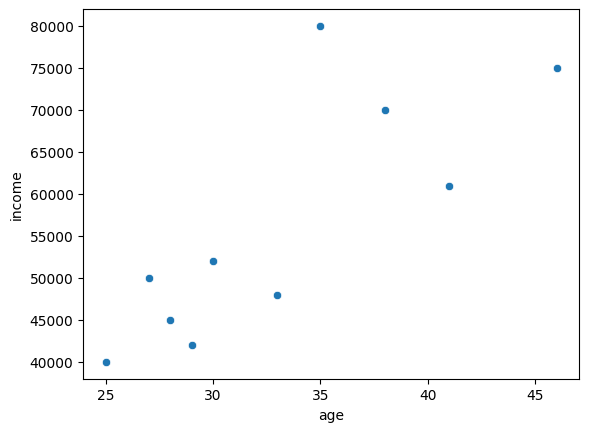

In [ ]:
"""
Advanced Python Lab 06
Name: Bibek Chand
Roll No: 5
"""

# Suppose actual column name is 'income'
sns.scatterplot(x='age', y='income', data=df)

<Axes: xlabel='gender', ylabel='income'>

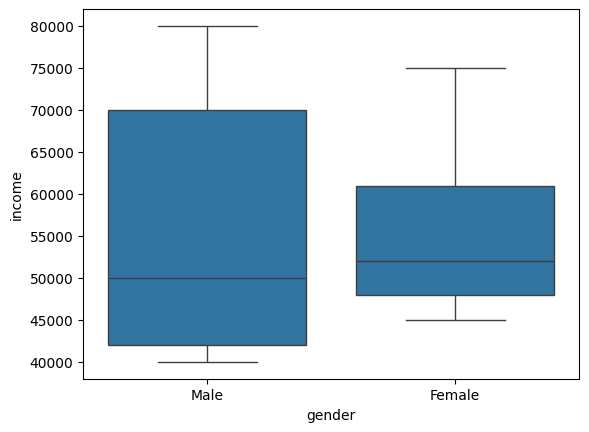

In [ ]:
"""
Advanced Python Lab 06
Name: Bibek Chand
Roll No: 5
"""

sns.boxplot(x='gender', y='income', data=df)

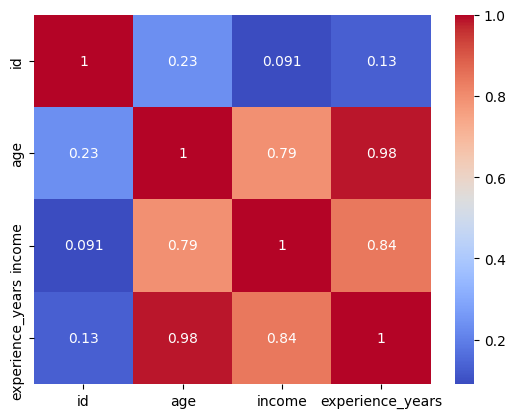

In [ ]:
"""
Advanced Python Lab 06
Name: Bibek Chand
Roll No: 5
"""

numeric_df = df.select_dtypes(include=np.number)  # Select only numeric columns
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

In [ ]:
"""
Advanced Python Lab 06
Name: Bibek Chand
Roll No: 5
"""

df.columns = df.columns.str.strip()
print(df.columns)

Index(['id', 'age', 'gender', 'education_level', 'income', 'experience_years',
       'employed'],
      dtype='object')
